In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nakulchamariya","key":"589927ae7c6e8d47e6ea59ec42178b84"}'}

In [2]:
!pip install kaggle

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# ! kaggle competitions download <name-of-competition>
!kaggle datasets download finalepoch/medical-ner

Dataset URL: https://www.kaggle.com/datasets/finalepoch/medical-ner
License(s): unknown
  0% 0.00/26.2k [00:00<?, ?B/s]
100% 26.2k/26.2k [00:00<00:00, 43.1MB/s]


In [5]:
!unzip /content/medical-ner.zip
!rm -rf /content/medical-ner.zip

Archive:  /content/medical-ner.zip
  inflating: Corona2.json            


In [6]:
!mv /content/Corona2.json /content/data.json

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_json('/content/data.json')
data.head()

,examples
0,"{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe',..."
1,"{'id': '487c93e3-0d45-4088-a378-cf3a01c8953d',..."
2,"{'id': 'd5056874-895a-4a7f-9e0f-828d414d65d9',..."
3,"{'id': '20c792c7-0c4b-42d0-8127-0e04113db384',..."
4,"{'id': 'f5359e0d-4d4a-4707-95a3-4c627fc4a83b',..."


In [8]:
data.shape

(31, 1)

In [9]:
data['examples'].values[0]

{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'content': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]",
 'metadata': {},
 'annotations': [{'id': '0825a1

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
from nltk.tokenize import word_tokenize

# Tokenize and Label Tokens
def format_data(row):
    row = row['examples']
    text = row['content']
    annotations = row['annotations']

    # Tokenize text
    tokens = word_tokenize(text)
    token_tags = ['O'] * len(tokens)

    for annotation in annotations:
        tag = annotation['tag_name']
        start, end = annotation['start'], annotation['end']
        annotated_text = text[start:end]
        annotated_tokens = word_tokenize(annotated_text)

        for i, token in enumerate(tokens):
            if token in annotated_tokens:
                idx = tokens.index(token)
                token_tags[idx] = f"B-{tag}" if i == 0 else f"I-{tag}"

    return list(zip(tokens, token_tags))

# Apply Formatting
data['formatted_data'] = data.apply(format_data, axis=1)

In [12]:
data['formatted_data'].values[0]

[('While', 'O'),
 ('bismuth', 'I-Medicine'),
 ('compounds', 'I-Medicine'),
 ('(', 'O'),
 ('Pepto-Bismol', 'I-Medicine'),
 (')', 'O'),
 ('decreased', 'O'),
 ('the', 'O'),
 ('number', 'O'),
 ('of', 'O'),
 ('bowel', 'O'),
 ('movements', 'O'),
 ('in', 'O'),
 ('those', 'O'),
 ('with', 'O'),
 ('travelers', 'O'),
 ("'", 'O'),
 ('diarrhea', 'I-MedicalCondition'),
 (',', 'O'),
 ('they', 'O'),
 ('do', 'O'),
 ('not', 'O'),
 ('decrease', 'O'),
 ('the', 'O'),
 ('length', 'O'),
 ('of', 'O'),
 ('illness', 'O'),
 ('.', 'O'),
 ('[', 'O'),
 ('91', 'O'),
 (']', 'O'),
 ('Anti-motility', 'O'),
 ('agents', 'O'),
 ('like', 'O'),
 ('loperamide', 'I-Medicine'),
 ('are', 'O'),
 ('also', 'O'),
 ('effective', 'O'),
 ('at', 'O'),
 ('reducing', 'O'),
 ('the', 'O'),
 ('number', 'O'),
 ('of', 'O'),
 ('stools', 'O'),
 ('but', 'O'),
 ('not', 'O'),
 ('the', 'O'),
 ('duration', 'O'),
 ('of', 'O'),
 ('disease', 'O'),
 ('.', 'O'),
 ('[', 'O'),
 ('8', 'O'),
 (']', 'O'),
 ('These', 'O'),
 ('agents', 'O'),
 ('should', 'O'),
 

In [14]:
from sklearn.preprocessing import LabelEncoder

# Prepare Data
sequences = [item for sublist in data['formatted_data'] for item in sublist]
tokens, tags = zip(*sequences)

len(tokens),len(tags)

(4028, 4028)

In [15]:
tokens[:10],tags[:10]

(('While',
  'bismuth',
  'compounds',
  '(',
  'Pepto-Bismol',
  ')',
  'decreased',
  'the',
  'number',
  'of'),
 ('O', 'I-Medicine', 'I-Medicine', 'O', 'I-Medicine', 'O', 'O', 'O', 'O', 'O'))

In [16]:
import re
from tqdm.auto import tqdm

clean_tokens = []
clean_tags = []
for token,tag in tqdm(zip(tokens,tags)):
    if re.sub(r'[^a-zA-Z0-9]', '', token) != '':
        clean_tokens.append(token)
        clean_tags.append(tag)

tokens, tags = clean_tokens,clean_tags
len(tokens),len(tags)

0it [00:00, ?it/s]

(3263, 3263)

In [17]:
tokens[:10],tags[:10]

(['While',
  'bismuth',
  'compounds',
  'Pepto-Bismol',
  'decreased',
  'the',
  'number',
  'of',
  'bowel',
  'movements'],
 ['O', 'I-Medicine', 'I-Medicine', 'I-Medicine', 'O', 'O', 'O', 'O', 'O', 'O'])

In [18]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
emb_model = SentenceTransformer("praneethvasarla/med-bert")

# The sentences to encode
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

# 2. Calculate embeddings by calling model.encode()
embeddings = emb_model.encode(sentences)
print(embeddings.shape)


config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at praneethvasarla/med-bert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

(3, 768)


In [19]:
token_embeddings = []

for token in tqdm(tokens):
    token_embeddings.append(emb_model.encode(token))

token_embeddings = np.array(token_embeddings)
token_embeddings.shape

  0%|          | 0/3263 [00:00<?, ?it/s]

(3263, 768)

In [20]:
# Encode Tokens and Tags
tag_encoder = LabelEncoder()
encoded_tags = tag_encoder.fit_transform(tags)
y = np.array(encoded_tags)

In [21]:
X = token_embeddings

In [22]:
from collections import Counter
import numpy as np

# Count occurrences of each class
class_counts = Counter(y)
print("Class Counts:", class_counts)

# Find classes with fewer than 2 examples
rare_classes = [cls for cls, count in class_counts.items() if count < 2]

# Remove rare classes
if rare_classes:
    print("Removing classes with fewer than 2 examples:", rare_classes)
    mask = np.isin(y, rare_classes, invert=True)
    X, y = X[mask], y[mask]

Class Counts: Counter({6: 2908, 3: 191, 4: 81, 5: 75, 0: 4, 1: 3, 2: 1})
Removing classes with fewer than 2 examples: [2]


In [23]:
X.shape,y.shape

((3262, 768), (3262,))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2609, 768), (653, 768), (2609,), (653,))

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_bal_acc = balanced_accuracy_score(y_train, y_train_pred)
test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)

# Misclassification Rate
train_misclassification_rate = 1 - train_bal_acc
test_misclassification_rate = 1 - test_bal_acc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report
# Get unique classes in y_test
unique_classes = np.unique(y_test)

# Update target names to match the classes in y_test
current_target_names = [tag_encoder.classes_[cls] for cls in unique_classes]

# Classification Report
class_report = classification_report(
    y_test,
    y_test_pred,
    labels=unique_classes,
    target_names=current_target_names
)

# Misclassification Rates for Each Class
class_misclassification_rates = 1 - np.diag(conf_matrix) / conf_matrix.sum(axis=1)

Train Balanced Accuracy: 0.6778469818452622
Test Balanced Accuracy: 0.7774435551938265
Train Misclassification Rate: 0.32215301815473785
Test Misclassification Rate: 0.22255644480617354

Classification Report:
                     precision    recall  f1-score   support

B-MedicalCondition       0.17      1.00      0.29         1
        B-Medicine       1.00      1.00      1.00         1
I-MedicalCondition       0.19      0.26      0.22        38
        I-Medicine       0.38      0.81      0.52        16
        I-Pathogen       0.29      0.73      0.42        15
                 O       0.96      0.86      0.90       582

          accuracy                           0.82       653
         macro avg       0.50      0.78      0.56       653
      weighted avg       0.88      0.82      0.84       653



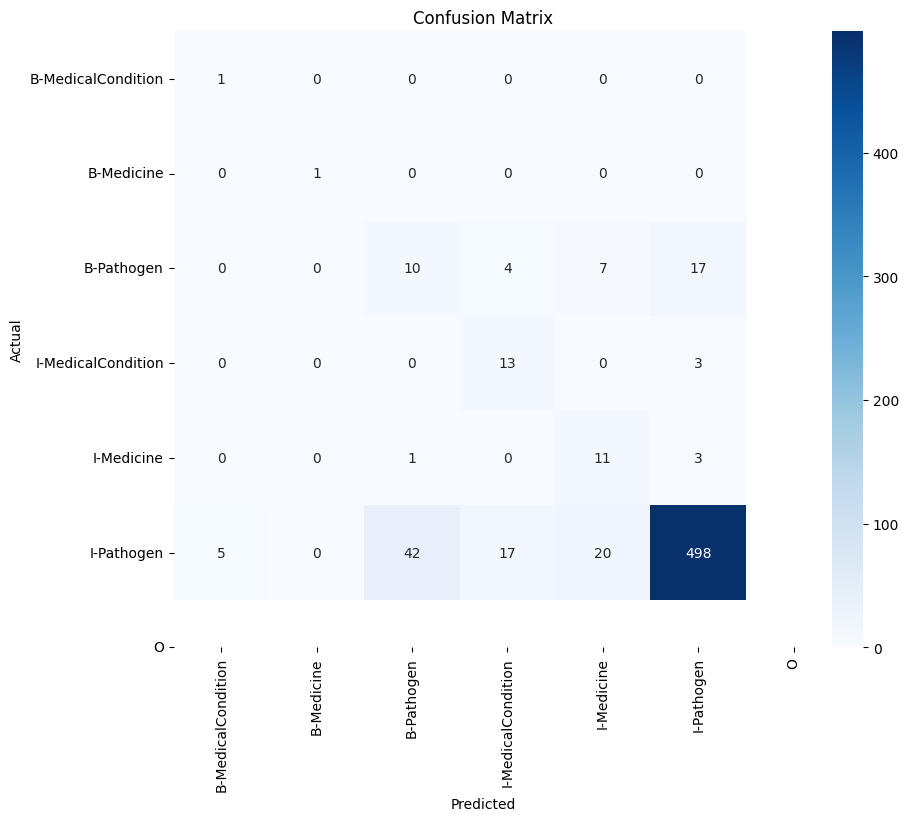

In [28]:
# Overall Metrics
print("Train Balanced Accuracy:", train_bal_acc)
print("Test Balanced Accuracy:", test_bal_acc)
print("Train Misclassification Rate:", train_misclassification_rate)
print("Test Misclassification Rate:", test_misclassification_rate)
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=tag_encoder.classes_, yticklabels=tag_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
from tqdm.auto import tqdm

def predict_ner(sentence):
    tokens = word_tokenize(sentence)
    word_tag_dict = {}
    for token in tqdm(tokens):
        if re.sub(r'[^a-zA-Z0-9]', '', token) == '':
            word_tag_dict[token] = 'O'
        else:
            s = emb_model.encode([token])
            y_test_pred = model.predict(s)[0]
            word_tag_dict[token] = tag_encoder.inverse_transform([y_test_pred])[0]
    return word_tag_dict

In [45]:
sentence = 'I am having cancer. I took paracetamol'
pred = predict_ner(sentence)
pred

  0%|          | 0/8 [00:00<?, ?it/s]

{'I': 'O',
 'am': 'O',
 'having': 'O',
 'cancer': 'I-MedicalCondition',
 '.': 'O',
 'took': 'O',
 'paracetamol': 'I-Medicine'}

# Bilstm crf

In [46]:
!pip install pytorch-crf

In [47]:
import torch
import torch.nn as nn
from torchcrf import CRF

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Define BiLSTM-CRF model
class BiLSTMCRF(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_tags):
        super(BiLSTMCRF, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim * 2, num_tags)
        self.crf = CRF(num_tags, batch_first=True)

    def forward(self, embeddings, tags=None, mask=None):
        lstm_out, _ = self.lstm(embeddings)
        emissions = self.hidden2tag(lstm_out)
        if tags is not None:
            loss = -self.crf(emissions, tags, mask=mask, reduction="mean")
            return loss
        else:
            return self.crf.decode(emissions, mask=mask)

In [48]:
# Model parameters
input_dim = 768  # Dimension of embeddings
hidden_dim = 256
num_tags = len(tag_encoder.classes_)

model = BiLSTMCRF(input_dim, hidden_dim, num_tags)

# Optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i in range(0, len(X), batch_size):
        embeddings = X[i:i+batch_size].unsqueeze(1)  # Add sequence dimension
        tags = y[i:i+batch_size].unsqueeze(1)  # Add sequence dimension
        mask = torch.ones(tags.shape, dtype=torch.uint8)  # Mask is all ones since all sequences are the same length

        optimizer.zero_grad()
        loss = model(embeddings, tags, mask)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

Epoch 1/10, Loss: 46.9019
Epoch 2/10, Loss: 35.9712
Epoch 3/10, Loss: 33.4095
Epoch 4/10, Loss: 31.2945
Epoch 5/10, Loss: 29.4880
Epoch 6/10, Loss: 27.7421
Epoch 7/10, Loss: 26.1176
Epoch 8/10, Loss: 24.6283
Epoch 9/10, Loss: 23.3408
Epoch 10/10, Loss: 22.2296


In [49]:
# Evaluation
model.eval()
with torch.no_grad():
    embeddings = X_test.unsqueeze(1)  # Add sequence dimension
    y_test_pred = model(embeddings)

    embeddings = X_train.unsqueeze(1)  # Add sequence dimension
    y_train_pred = model(embeddings)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
train_bal_acc = balanced_accuracy_score(y_train, y_train_pred)
test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)

# Misclassification Rate
train_misclassification_rate = 1 - train_bal_acc
test_misclassification_rate = 1 - test_bal_acc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report
# Get unique classes in y_test
unique_classes = np.unique(y_test)

# Update target names to match the classes in y_test
current_target_names = [tag_encoder.classes_[cls] for cls in unique_classes]

# Classification Report
class_report = classification_report(
    y_test,
    y_test_pred,
    labels=unique_classes,
    target_names=current_target_names
)

# Misclassification Rates for Each Class
class_misclassification_rates = 1 - np.diag(conf_matrix) / conf_matrix.sum(axis=1)

Train Balanced Accuracy: 0.6386282514563835
Test Balanced Accuracy: 0.8231352113100621
Train Misclassification Rate: 0.36137174854361653
Test Misclassification Rate: 0.17686478868993794

Classification Report:
                     precision    recall  f1-score   support

B-MedicalCondition       1.00      1.00      1.00         1
        B-Medicine       1.00      1.00      1.00         1
I-MedicalCondition       0.64      0.61      0.62        38
        I-Medicine       1.00      0.69      0.81        16
        I-Pathogen       1.00      0.67      0.80        15
                 O       0.96      0.98      0.97       582

          accuracy                           0.94       653
         macro avg       0.93      0.82      0.87       653
      weighted avg       0.94      0.94      0.94       653



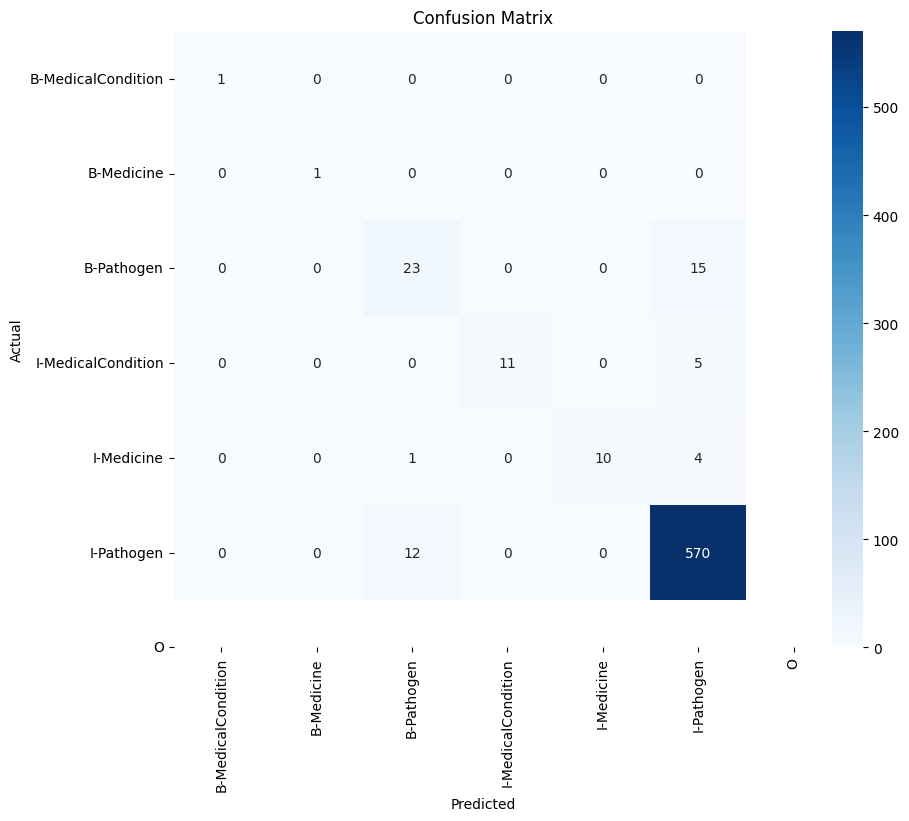

In [51]:
# Overall Metrics
print("Train Balanced Accuracy:", train_bal_acc)
print("Test Balanced Accuracy:", test_bal_acc)
print("Train Misclassification Rate:", train_misclassification_rate)
print("Test Misclassification Rate:", test_misclassification_rate)
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=tag_encoder.classes_, yticklabels=tag_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
# Save model and optimizer state
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'num_tags': num_tags,  # Save any important hyperparameters
    'input_dim': input_dim,
    'hidden_dim': hidden_dim
}, 'bilstm_crf_model.pth')

print("Model saved successfully!")


Model saved successfully!


In [53]:
# Load the saved model
checkpoint = torch.load('bilstm_crf_model.pth')

# Recreate the model with the saved parameters
input_dim = checkpoint['input_dim']
hidden_dim = checkpoint['hidden_dim']
num_tags = checkpoint['num_tags']

model = BiLSTMCRF(input_dim, hidden_dim, num_tags)

# Load the saved state dictionaries
model.load_state_dict(checkpoint['model_state_dict'])

# (Optional) Load the optimizer state if needed for further training
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

print("Model loaded successfully!")


Model loaded successfully!


In [54]:
from tqdm.auto import tqdm
import torch

def predict_ner(sentence):
    tokens = word_tokenize(sentence)
    word_tag_dict = {}
    for token in tqdm(tokens):
        if re.sub(r'[^a-zA-Z0-9]', '', token) == '':
            word_tag_dict[token] = 'O'
        else:
            s = emb_model.encode([token])
            s = torch.tensor(s, dtype=torch.float32)
            model.eval()
            with torch.no_grad():
                embeddings = s.unsqueeze(1)  # Add sequence dimension
                y_test_pred = model(embeddings)
            word_tag_dict[token] = [tag_encoder.inverse_transform(p) for p in y_test_pred][0][0]
    return word_tag_dict

In [55]:
sentence = 'cancer paracetamol'
d = predict_ner(sentence)
d

  0%|          | 0/2 [00:00<?, ?it/s]

{'cancer': 'I-MedicalCondition', 'paracetamol': 'I-MedicalCondition'}

In [56]:
import joblib
joblib.dump(tag_encoder, 'tag_encoder.pkl')

['tag_encoder.pkl']

# web ui

In [57]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [70]:
%%writefile app.py
import streamlit as st
import torch
from tqdm.auto import tqdm
from transformers import pipeline
from nltk.tokenize import word_tokenize
import re
import joblib
import torch
import torch.nn as nn
from torchcrf import CRF
from sentence_transformers import SentenceTransformer

class BiLSTMCRF(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_tags):
        super(BiLSTMCRF, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim * 2, num_tags)
        self.crf = CRF(num_tags, batch_first=True)

    def forward(self, embeddings, tags=None, mask=None):
        lstm_out, _ = self.lstm(embeddings)
        emissions = self.hidden2tag(lstm_out)
        if tags is not None:
            loss = -self.crf(emissions, tags, mask=mask, reduction="mean")
            return loss
        else:
            return self.crf.decode(emissions, mask=mask)

# Load your model and other components
# Ensure these are defined or loaded before running the app
@st.cache_resource
def load_model_and_encoder():
    checkpoint = torch.load('bilstm_crf_model.pth')
    input_dim = checkpoint['input_dim']
    hidden_dim = checkpoint['hidden_dim']
    num_tags = checkpoint['num_tags']
    model = BiLSTMCRF(input_dim, hidden_dim, num_tags)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    tag_encoder = joblib.load('tag_encoder.pkl')
    emb_model = SentenceTransformer("praneethvasarla/med-bert")

    return model, tag_encoder, emb_model

model, tag_encoder, emb_model = load_model_and_encoder()
print("Models loaded successfully")

# Define prediction function
def predict_ner(sentence):
    tokens = word_tokenize(sentence)
    word_tag_dict = {}
    for token in tqdm(tokens):
        if re.sub(r'[^a-zA-Z0-9]', '', token) == '':
            word_tag_dict[token] = 'O'
        else:
            s = emb_model.encode([token])
            s = torch.tensor(s, dtype=torch.float32)
            with torch.no_grad():
                embeddings = s.unsqueeze(1)  # Add sequence dimension
                y_test_pred = model(embeddings)
            word_tag_dict[token] = [tag_encoder.inverse_transform(p) for p in y_test_pred][0][0]
    return word_tag_dict

# Streamlit UI
def main():
    st.title("Named Entity Recognition (NER) Tool")
    st.write("Input a sentence, and the model will predict the NER tags for each word.")

    # Input area
    sentence = st.text_area("Enter a sentence:", "")

    # Predict button
    if st.button("Predict NER Tags"):
        if sentence.strip() == "":
            st.warning("Please enter a valid sentence!")
        else:
            st.info("Processing your sentence...")
            with st.spinner("Predicting NER tags..."):
                result = predict_ner(sentence)
            st.success("Prediction completed!")

            # Display results
            st.write("### NER Tags")
            for word, tag in result.items():
                st.write(f"**{word}**: {tag}")

# Run the app
if __name__ == "__main__":
    main()


Overwriting app.py


In [64]:
!pip install pyngrok

In [71]:
from pyngrok import ngrok

ngrok_key = "2oVc3Q5FQMVrORj72rHxDFTdf27_2gpUiSu8L5hdL7F1drGwg"
port = 8501

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://e3b8-34-127-68-196.ngrok-free.app'

In [72]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt